In [7]:
import pandas as pd
import yfinance as yf
import numpy as np

                   QQQ       AAPL
Date                             
2015-01-02   97.204514  24.714508
2015-01-05   95.778648  24.018265
2015-01-06   94.494408  24.020527
2015-01-07   95.712547  24.357340
2015-01-08   97.544449  25.293205
...                ...        ...
2019-12-24  209.709991  69.938202
2019-12-26  211.560501  71.325798
2019-12-27  211.382385  71.298737
2019-12-30  209.996979  71.721909
2019-12-31  210.392807  72.245949

[1258 rows x 2 columns]


<AxesSubplot:xlabel='Date'>

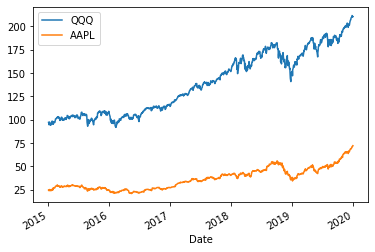

In [1]:
start = '20150101'
end = '20200101'

qqq = yf.Ticker('QQQ')
qqq_price = qqq.history(period='max')['Close'][start:end]
qqq_price.name = 'QQQ'

aapl = yf.Ticker('AAPL')
aapl_price = aapl.history(period='max')['Close'][start:end]
aapl_price.name = 'AAPL'

prices = pd.concat([qqq_price, aapl_price], axis=1)

print(prices)
prices.plot()

In [2]:
def daily_returns(prices):
    res = (prices/prices.shift(1) - 1.0)[1:]
    return res


def cumulative_returns(returns):
    res = (returns + 1.0).cumprod()
    return res

In [3]:
cum_returns = cumulative_returns(daily_returns(prices))

<AxesSubplot:xlabel='Date'>

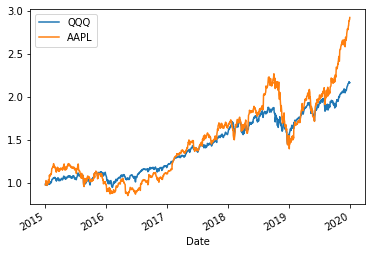

In [4]:
cum_returns.plot()

In [5]:
cum_returns

,QQQ,AAPL
Date,,
2015-01-05,0.985331,0.971829
2015-01-06,0.972120,0.971920
2015-01-07,0.984651,0.985548
2015-01-08,1.003497,1.023415
2015-01-09,0.996891,1.024513
...,...,...
2019-12-24,2.157410,2.829844
2019-12-26,2.176447,2.885989
2019-12-27,2.174615,2.884894


In [8]:
res = cum_returns.copy()
res['one'] = 1.0
# res['AAPL'] = beta * res['QQQ'] + alpha
beta, alpha = np.linalg.lstsq(res[['QQQ', 'one']],
                              res['AAPL'],
                              rcond=None)[0]
print(f'{beta}, {alpha}')

1.2961911884492303, -0.36484985380256635


In [9]:
res = cum_returns.copy()
res['one'] = 1.0
# res['AAPL'] = beta * res['QQQ'] + alpha
beta, alpha = np.linalg.lstsq(res[['AAPL', 'one']],
                              res['QQQ'],
                              rcond=None)[0]
print(f'{beta}, {alpha}')

0.7135689561500744, 0.3676732270346248


In [11]:
import seaborn as sns

<AxesSubplot:xlabel='Date'>

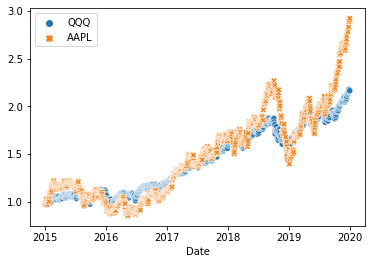

In [14]:
sns.scatterplot(data=cum_returns, x='QQQ', y='AAPL')

In [22]:
import matplotlib.pyplot as plt


<AxesSubplot:xlabel='QQQ', ylabel='AAPL'>

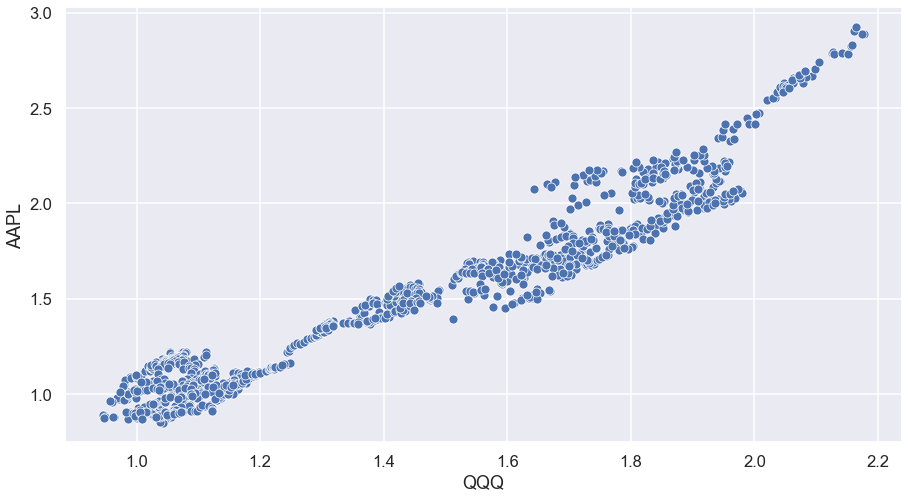

In [24]:
sns.set()
sns.set_theme('talk')

plt.figure(figsize = (15,8))

sns.scatterplot(data=cum_returns, x='QQQ', y='AAPL')

<AxesSubplot:xlabel='QQQ', ylabel='AAPL'>

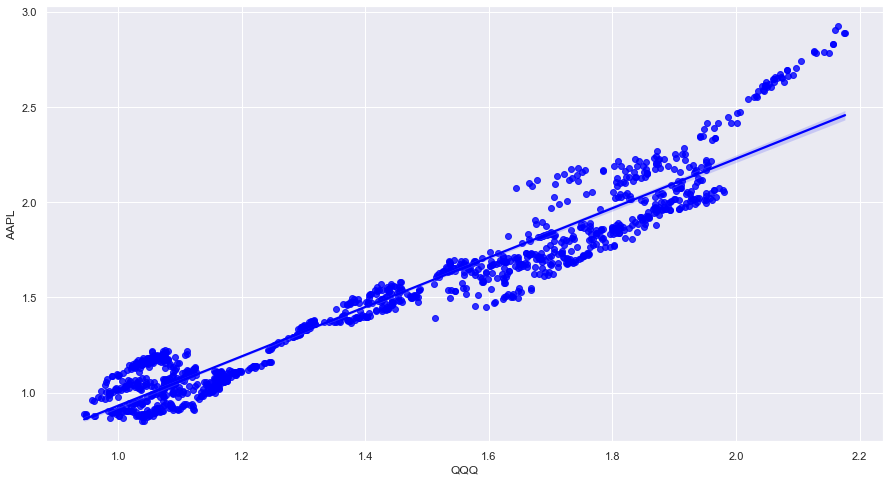

In [32]:
plt.figure(figsize = (15,8))


sns.set_theme(color_codes=True)
sns.regplot(x="QQQ", y="AAPL", data=cum_returns,fit_reg = True, color = 'blue')

/Users/jonathanlifferth/PycharmProjects/longevity/market_trend_dashboard/venv/lib/python3.9/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


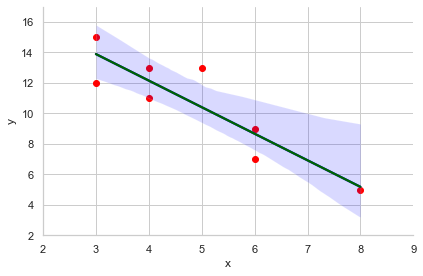

In [33]:
import pandas 
x = [5, 3, 6, 3, 4, 4, 6, 8]
y = [13, 15, 7, 12, 13, 11, 9, 5]
d = pandas.DataFrame({'x':x, 'y': y})
import seaborn
import matplotlib.pyplot as plt 
seaborn.set(style = 'whitegrid')
p = seaborn.FacetGrid(d, size = 4, aspect = 1.5) 
p.map(plt.scatter, 'x', 'y', color = 'red')
p.map(seaborn.regplot, 'x', 'y', scatter = False, ci = 95, 
    fit_reg = True, color = 'blue') 
p.map(seaborn.regplot, 'x', 'y', scatter = False, ci = 0, 
    fit_reg = True, color = 'darkgreen')
p.set(xlim = (2, 9)) 
p.set(ylim = (2, 17)) 
p.savefig('xy-regression-ci.pdf', bbox_inches='tight')